In [1]:
from pandas import DataFrame
import pandas as pd

In [2]:
df = DataFrame(
    {
        'score':[1,2,3,4,5],
        'labels':[0,0,1,1,1]
    }
)

In [3]:
def get_calibration(labels, score):
    df_calibrated = DataFrame(
        {
            'labels': labels,
            'score': score
        }
    )
    df_calibrated['score_cutted'] = pd.qcut(df_calibrated['score'], 5)
    df_calibrated = df_calibrated.groupby('score_cutted')[['score', 'labels']].agg('mean')
    df_calibrated = df_calibrated.rename(columns={'score': 'mean_score', 'labels': 'positive_rate'})
    df_calibrated.index = df_calibrated.index.astype(object)

    return df_calibrated


get_calibration(df['labels'], df['score'])

,mean_score,positive_rate
score_cutted,,
"(0.999, 1.8]",1,0
"(1.8, 2.6]",2,0
"(2.6, 3.4]",3,1
"(3.4, 4.2]",4,1
"(4.2, 5.0]",5,1


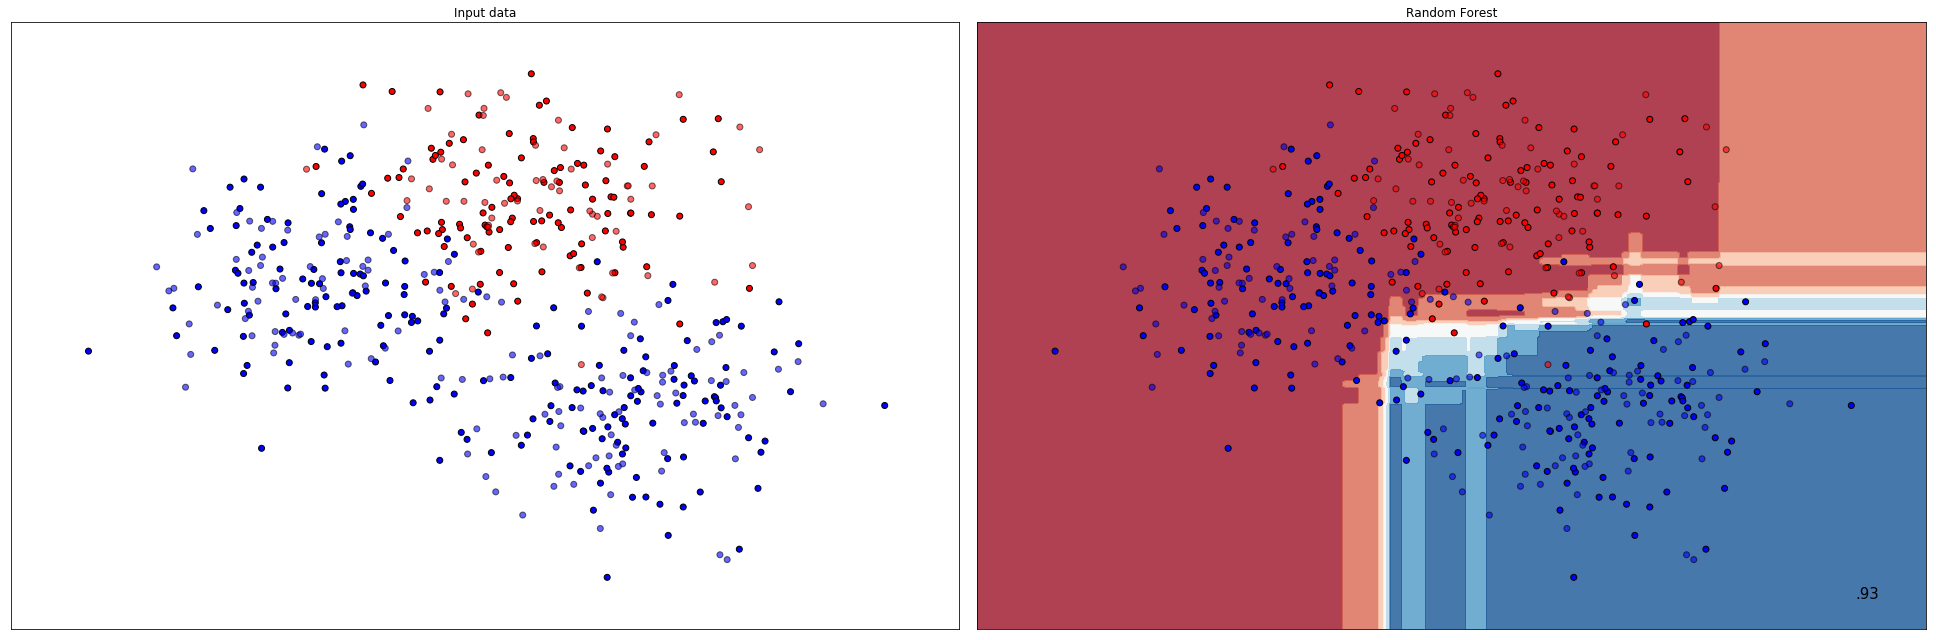

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Colormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

h = .02  # step size in the mesh

names = ["Random Forest"]

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]


datasets = [make_blobs(random_state=0, n_samples=500)]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [5]:
from lime import lime_tabular

In [6]:
explainer = lime_tabular.LimeTabularExplainer(X_train, discretizer='decile')

In [7]:
from numpy import array

In [14]:
exp = explainer.explain_instance(array([-1.5, 1.5]), clf.predict_proba, num_samples=500)
exp

In [15]:
perturbed = exp.info['inverse']

In [16]:
exp.info['data']

array([[1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.

In [17]:
perturbed

array([[-1.5       ,  1.5       ],
       [ 0.66304323,  0.9513155 ],
       [-1.36711728,  0.9513155 ],
       [ 0.86557999,  0.67669857],
       [ 0.66304323, -1.31990873],
       [ 1.2285978 ,  0.10182011],
       [ 0.36879163, -0.56884981],
       [ 0.36879163,  0.37780691],
       [ 0.66304323,  1.27983123],
       [-1.36711728, -1.31990873],
       [ 0.66304323, -0.90621136],
       [ 0.36879163, -1.31990873],
       [ 0.66304323, -0.20149076],
       [ 0.08273835,  0.37780691],
       [-0.94953383, -0.56884981],
       [ 0.08273835, -0.56884981],
       [ 1.2285978 ,  0.10182011],
       [-1.36711728, -1.31990873],
       [ 1.2285978 ,  0.9513155 ],
       [-0.27975608, -0.93061995],
       [ 0.69168224, -1.31990873],
       [ 0.36879163,  0.37780691],
       [ 1.2285978 , -1.31990873],
       [-1.36711728,  0.9513155 ],
       [-0.59159513, -1.25536313],
       [ 0.86557999, -0.56884981],
       [ 0.08273835,  1.29314205],
       [ 0.86557999,  0.9513155 ],
       [-0.94953383,

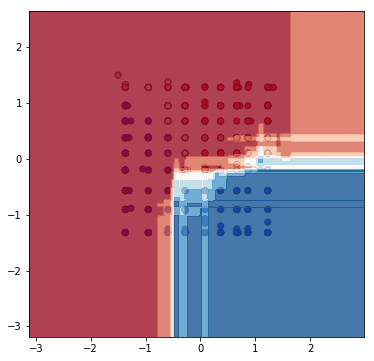

In [20]:
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.scatter(perturbed[:, 0], perturbed[:, 1], c=exp.info['yys'][:,0], cmap='bwr' ,
           edgecolors='k', marker='o')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)


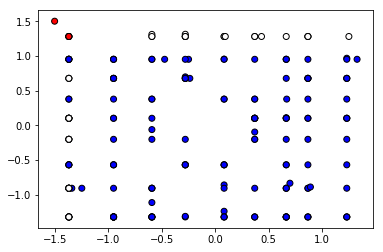

In [13]:
ax = plt.subplot()
ax.scatter(perturbed[:, 0], perturbed[:, 1], c=exp.info['data'].sum(axis=1), cmap='bwr' ,
           edgecolors='k')
# Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)


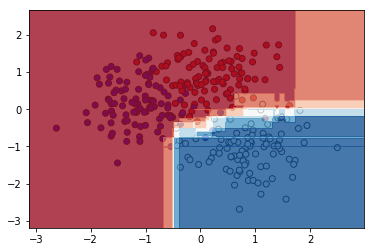

In [58]:
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=1-y_train, cmap='bwr' ,
           edgecolors='k')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)


In [59]:
from pandas import DataFrame
from numpy import hstack

In [60]:
regression_data = DataFrame(
    hstack(
        (
            exp.info['data'], 
            exp.info['yys'][:, [0]]
        )
    ),
    columns=['f1', 'f2', 'p']
)

In [61]:
regression_data['score'] = 0.5*regression_data['f1'] + 0.5*regression_data['f2']

In [62]:
regression_data

,f1,f2,p,score
0,1.0,1.0,0.100000,1.0
1,1.0,0.0,0.000000,0.5
2,0.0,0.0,0.989653,0.0
3,0.0,0.0,0.002564,0.0
4,0.0,0.0,0.000000,0.0
5,1.0,0.0,0.000000,0.5
6,0.0,0.0,0.834189,0.0
7,1.0,0.0,0.000000,0.5
8,0.0,0.0,0.821587,0.0
9,0.0,0.0,0.989653,0.0


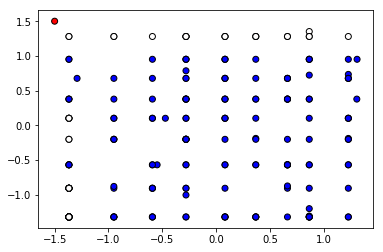

In [63]:
ax = plt.subplot()
ax.scatter(perturbed[:, 0], perturbed[:, 1], c=regression_data['score'], cmap='bwr' ,
           edgecolors='k')


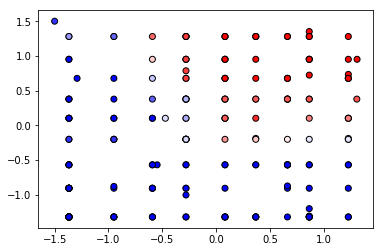

In [64]:
ax = plt.subplot()
ax.scatter(perturbed[:, 0], perturbed[:, 1], c=regression_data['p'], cmap='bwr' ,
           edgecolors='k')
